In [1]:
#import packages.berserk.berserk as berserk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('graph_ready.pkl')

In [ ]:
import plotly.express as px
fig = px.line(df,x='depth',y='white',color='opening')
fig.show()

In [ ]:
slice = df.loc[df.depth == 10].index
df.loc[slice,'max_win'] = df.loc[slice,'white']
df.loc[slice,'min_win'] = df.loc[slice,'white']
df.loc[slice,'avg_win'] = df.loc[slice,'white']
df.loc[slice,'variance'] = df.loc[slice,'white']


In [3]:
df['play'] = df['play'].astype('str')
df['play'] = df['play'].apply(lambda x : str(str(x).strip("[]")))

In [ ]:
df['play'].head()

In [ ]:
total = len(df.query('depth <10'))
test = pd.DataFrame()
def calculate_bounds(x):
    global total
    global test
    i = x.name
    children_i = test.index
    if len(children_i) == 0:
        df.loc[i,'max_win'] = df.loc[i,'white']
        df.loc[i,'min_win'] = df.loc[i,'white']
        df.loc[i,'avg_win'] = df.loc[i,'white']
        df.loc[i,'variance'] = 0
    else:
        df.loc[i,'max_win'] = df.loc[children_i,'max_win'].max()
        df.loc[i,'min_win'] = df.loc[children_i,'min_win'].min()
        df.loc[i,'avg_win'] = df.loc[children_i,'avg_win'].mean()
        df.loc[i,'variance'] = df.loc[children_i,'avg_win'].std(ddof=0)

In [ ]:
for depth in range(9,0,-1):
    df.loc[df.depth == depth].apply(lambda x : calculate_bounds(x),axis=1)


In [ ]:
df.head()

In [4]:
grouped_df = df.groupby(['opening']).agg({'white':['min','max','mean','std','count']})
grouped_df.columns = grouped_df.columns.droplevel(level=0)
grouped_df.rename(columns={
    'min':'min_win_rate',
    'max':'max_win_rate',
    'mean':'avg_win_rate',
    'std':'standard_deviation',
    'count':'games'
},inplace=True)
grouped_df.head()

,min_win_rate,max_win_rate,avg_win_rate,standard_deviation,games
opening,,,,,
Benko gambit,0.367251,0.637915,0.436970,0.048076,32
Benoni,0.367251,0.637915,0.487978,0.035721,643
Bishop's opening,0.047578,0.998028,0.504891,0.044024,14409
Blackmar-Diemer Gambit,0.409164,0.685384,0.499776,0.050036,85
Boden-Kieseritsky gambit,0.503268,0.679913,0.604399,0.061497,14


In [5]:
grouped_df = grouped_df.sort_values(by='games',ascending=False)
grouped_df.reset_index(inplace=True)

In [6]:
grouped_df

,opening,min_win_rate,max_win_rate,avg_win_rate,standard_deviation,games
0,Queen's pawn game,0.095171,0.930021,0.503396,0.040204,70184
1,Sicilian,0.059768,0.771576,0.471763,0.040132,24196
2,Queen's Gambit Declined,0.320915,0.739167,0.513128,0.039180,18555
3,Bishop's opening,0.047578,0.998028,0.504891,0.044024,14409
4,French,0.059768,0.646714,0.484660,0.046848,12194
...,...,...,...,...,...,...
57,Neo-Gruenfeld,0.497364,0.532003,0.513787,0.012630,28
58,Evans gambit,0.498243,0.561413,0.525924,0.023048,15
59,Boden-Kieseritsky gambit,0.503268,0.679913,0.604399,0.061497,14
60,King's knight,0.509508,0.509508,0.509508,NaN,1


In [7]:
import plotly.express as px
fig = px.bar(grouped_df, x='opening', y='games')
fig.show()

C:\Users\gq19765\AppData\Local\Temp\ipykernel_23484\104958680.py:6: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



<AxesSubplot: >

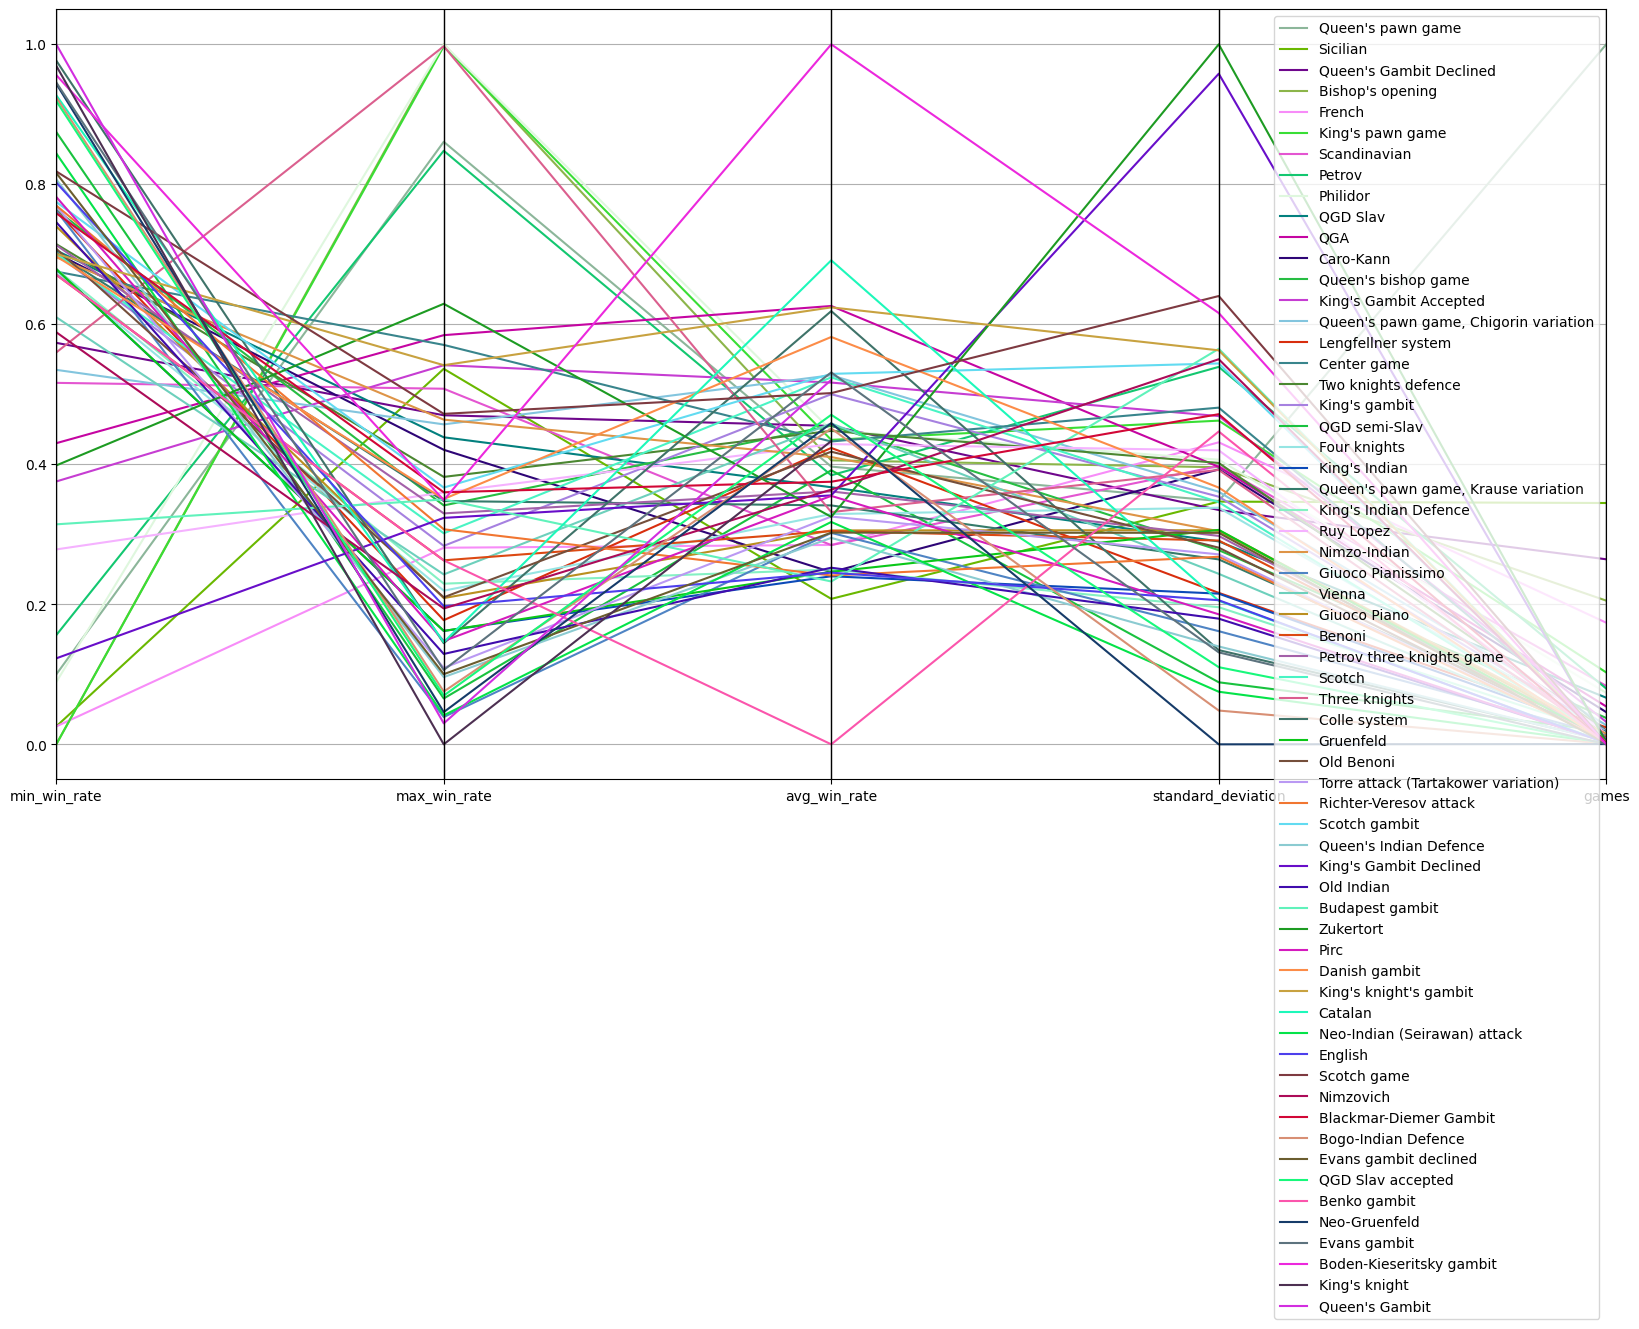

In [22]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,10))

df2 = grouped_df.drop('opening',axis=1)
df2_norm = (df2-df2.min())/(df2.max()-df2.min())
df2_norm = pd.concat((df2_norm, grouped_df.opening), 1)

#column = 'standard_deviation'
#grouped_df[column] = (grouped_df[column] - grouped_df[column].min()) / (grouped_df[column].max() - grouped_df[column].min())
#column = 'games'
#grouped_df[column] = (grouped_df[column] - grouped_df[column].min()) / (grouped_df[column].max() - grouped_df[column].min())
parallel_coordinates(df2_norm,'opening')

In [18]:
import plotly.express as px
fig = px.parallel_coordinates(df2_norm, color="opening", labels={"opening": "opening",
                "min_win": "min_win", "max_win": "max_win",
                "avg_win": "avg_win", "standard_deviation": "standard_deviation","games":"games" },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

c:\Users\gq19765\SyncThing\Repositories\lichess-data-driven-improvement\chess\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



ValueError: 
    Invalid element(s) received for the 'color' property of parcoords.line
        Invalid elements include: ["Queen's pawn game", 'Sicilian', "Queen's Gambit Declined", "Bishop's opening", 'French', "King's pawn game", 'Scandinavian', 'Petrov', 'Philidor', 'QGD Slav']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcoords.line.colorscale
      - A list or array of any of the above

## Scatter-plot of game win-rate at that point in the opening tree
Note: most entries don't have a valid opening, so this isn't representative. Value counts of openings shown lower down

In [ ]:
sns.relplot(
    data=df, x="depth", y="white",
    size="move_total_games", sizes=(15, 200), hue="opening"
)

In [ ]:
df['opening'].value_counts()

In [ ]:
sns.relplot(
    data=df, x="depth", y="variance", kind="line", markers=True
)

In [ ]:
sns.relplot(
    data=df, x="depth", y="white", kind="line", hue="opening",style='opening', markers=True, height=7, aspect=2
)

In [ ]:
sns.relplot(
    data=df, x="depth", y="white", kind="line", hue="opening", estimator=None
)

## Simulation
- Here's the  idea: As white, we have choice. Black is the other player, and so we have no control over what they do. 
- When simulating games like this, we can have black's moves be a probability, based on the frequencies of that move being made as stored in the dataframe from the lichess API. 
- Then, for white's move, we can try selecting the move with the highest average win rate, or the highest win rate with the lowest deviation. I guess we want to subtract the standard deviation from the average, to give us a good metric for choice. 

In [ ]:
df.head()

In [ ]:
df.rename(columns={'variance':'standard_deviation'}, inplace=True)
df['score'] = df['avg_win'] - df['standard_deviation']

In [ ]:
df.to_pickle('final_output.pkl')
df.to_csv('final_output.csv')

In [ ]:
def black_turn(moves):
    weights = moves['move_perc'].copy() / moves['move_perc'].copy().sum()
    move = moves.loc[np.random.choice(moves.index,1,p=weights)].copy()
    return move
    
def white_turn(moves):
    move = moves.loc[[moves['score'].idxmax()]].copy()
    return move

def game_simulation(df,start_depth,max_depth):
    for turn in range(start_depth,max_depth):
        play = str(result['play'].tolist()[0])
        print("===== Turn " + str(turn) + " =====")
        moves = df.query('play.str.contains(@play) and depth==@turn').copy()
        if len(moves) == 0:
            print("0 moves")
            continue
        if depth == 10:
            print("depth == 10")
            if (turn%2==0):
                print('Black to move')
                result = black_turn(moves)
            else:
                print('White to move')
                result = white_turn(moves)
            return result
        else:
            print("depth != 10")
            if (turn%2==0):
                print('Black to move')
                result = black_turn(moves)
                play = str(result['play'].tolist()[0])
            else:
                print('White to move')
                result = white_turn(moves)
                play = str(result['play'].tolist()[0])        

In [ ]:
results = []
for game in range(0,1000):
    result = game_simulation(df,1,11)
    results.append(result)
results = pd.concat(results,axis=0,ignore_index=True)

In [ ]:
import plotly.express as px
fig = px.histogram(results, x="white",
                   marginal="box", # or violin, rug
                   hover_data=results.columns)
fig.show()

Problem here is we don't know what opening led to this success, so it would be nice to have the opening labelled. Many of these results don't have labelled openings, so we will "carry through" earlier openings if they don't exist. 

We'll have a quick look at the proportion of named openings for different depths, and based on the highest depth with a reasonably high proportion of openings, we'll grab the first few elements of the results table's play sequences, grab the appropriate number of moves, find the opening in the eco dictonary, and then append this opening to the end of the results. Finally, we will plot said openings and see which opening led to the highest rate of success. 

In [ ]:
for depth in ([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]):
    openings = simple_df.query('depth == @depth')['opening']
    print("Proportion of openings present for depth = " + str(depth))
    print(str(((len(openings) - openings.isnull().sum())/len(openings))*100) + "%")

In [ ]:
openings = results['opening']
print(str(((len(openings) - openings.isnull().sum())/len(openings))*100) + "%")

In [ ]:
results['opening'] = results['opening'].fillna('No opening identified')
results['opening'] = results['opening'].replace('^\s*$','No opening identified', regex=True)

In [ ]:
sns.displot(df, x="white", hue="opening", kind="kde")

First and second move

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace('"','')
test['play'] = test['play'].str.split(",").replace("'",'')
test['play'] = test['play'].apply(lambda x: x[0:2])
test['play'] = test['play'].str.join(', ')
test.loc[test['play']=="'d2d4',   'd7d5'",'play'] = 'Closed game'
test.loc[test['play']=="'d2d4',   'g8f6'",'play'] = 'Indian defence'
sns.displot(test, x="white", hue="play", multiple="stack")

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:3])
test['play'] = test['play'].str.join(', ')
test.loc[test['play']=="d2d4,  d7d5,  c2c4",'play'] = "The Queen's Gambit"
test.loc[test['play']=="d2d4,  g8f6,  c2c4",'play'] = 'Indian defence'
sns.displot(test, x="white", hue="play", multiple="stack")

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:4])
test['play'] = test['play'].str.join(', ')
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6",'play'] = "Slav Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4",'play'] = "Queen's Gambit Accepted"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6",'play'] = 'Indian defence: West Indian Defence'
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6",'play'] = 'Indian defence: Normal variation'
sns.displot(test, x="white", hue="play", multiple="stack")

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:5])
test['play'] = test['play'].str.join(', ')
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3",'play'] = "King's Indian Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3",'play'] = 'Indian defence: Normal variation'
sns.displot(test, x="white", hue="play", multiple="stack")

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:6])
test['play'] = test['play'].str.join(', ')

test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  e6d5",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  b7b5",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  f6d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  g8f6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  f8g7",'play'] = "King's Indian Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  f8b4",'play'] = "Nimzo-Indian Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  d8d5",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  d7d5",'play'] = "Queen's Gambit Declined: Normal Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  f6d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  d8d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  d7d5",'play'] = 'Grunfeld Defence'
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  d8d5",'play'] = "Queen's Gambit Declined: Marshall Defence"
sns.displot(test, x="white", hue="play", multiple="stack")
print(test['play'].value_counts())

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:7])
test['play'] = test['play'].str.join(', ')

test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  e6d5,  g1f3",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5,  b1c3",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  b7b5,  a2a4",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  f6d5,  e2e4",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  g8f6,  f1c4",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  f8g7,  e2e4",'play'] = "King's Indian Defence: Normal Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  f8b4,  a2a3",'play'] = "Nimzo-Indian Defence: Samisch Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6,  f1c4",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  d8d5,  b1c3",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  d7d5,  c1g5",'play'] = "Queen's Gambit Declined: Modern Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  f6d5,  e2e4",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  d8d5,  b1c3",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  d7d5,  c1g5",'play'] = 'Grunfeld Defence: Stockholm Variation'
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  d8d5,  b1c3",'play'] = "Queen's Gambit Declined: Marshall Defence"
sns.displot(test, x="white", hue="play", multiple="stack")
print(test['play'].value_counts())

In [ ]:
test = results.copy()
test['play'] = results['play'].str.replace("'","")
test['play'] = test['play'].str.split(",")
test['play'] = test['play'].apply(lambda x: x[0:8])
test['play'] = test['play'].str.join(', ')
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  e6d5,  g1f3,  g8f6",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  e6d5,  g1f3,  b8c6",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  d8d5,  b1c3,  d5d8",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  e7e6,  c4d5,  d8d5,  b1c3,  f8b4",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  b7b5,  a2a4,  c7c6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  b7b5,  a2a4,  c8d7",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  g8f6,  f1c4,  e7e6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  g8f6,  f1c4,  b8c6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  g8f6,  f1c4,  c8f5",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6,  f1c4,  g8f6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6,  f1c4,  a7a6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6,  f1c4,  f8b4",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  d5c4,  e2e3,  e7e6,  f1c4,  b8c6",'play'] = "Queen's Gambit Accepted: Old Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  f6d5,  e2e4,  d5b6",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  f6d5,  e2e4,  d5f6",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  d8d5,  b1c3,  d5d8",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  g8f6,  c4d5,  d8d5,  b1c3,  d5a5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5,  b1c3,  g8f6",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5,  b1c3,  e7e6",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5,  b1c3,  b8c6",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  d7d5,  c2c4,  c7c6,  c4d5,  c6d5,  b1c3,  c8f5",'play'] = "Slav Defence: Exchange Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  d7d5,  c1g5,  f8b4",'play'] = "Queen's Gambit Declined: Modern Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  f8b4,  a2a3,  b4c3",'play'] = "Nimzo-Indian Defence: Samisch Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  e7e6,  b1c3,  d7d5,  c1g5,  f8e7",'play'] = "Queen's Gambit Declined"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  d8d5,  b1c3,  d5a5",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  d8d5,  b1c3,  d5d8",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  f6d5,  e2e4,  d5f6",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  d7d5,  c4d5,  f6d5,  e2e4,  d5b6",'play'] = "Queen's Gambit Declined: Marshall Defence"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  f8g7,  e2e4,  d7d6",'play'] = "King's Indian Defence: Normal Variation"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  f8g7,  e2e4,  e8h8",'play'] = "King's Indian Defence: Fischer Transposition"
test.loc[test['play']=="d2d4,  g8f6,  c2c4,  g7g6,  b1c3,  d7d5,  c1g5,  f8g7",'play'] = "Grunfeld Defence: Stockholm Variation"

sns.displot(test, x="white", hue="play", multiple="stack")
print(test['play'].value_counts())

In [ ]:
grouped = df.groupby("play")
df2 = pd.DataFrame({col:vals['white'] for col,vals in grouped})
meds = df2.median().sort_values()
df2 = df2[meds.index].boxplot(rot=90)


In [ ]:
import plotly.express as px
fig = px.box(df, x="opening", y="white", color="opening")
fig.update(layout_showlegend=False)
fig.show()

In [ ]:
df_gb = test.groupby(['play']).size()/len(test['play'])
df_gb.sort_values(inplace=True,ascending=False)
df_gb.plot(kind='bar')


In [ ]:
print(df_gb)

- 25% of Queen's Gambit games are accepted, leading to a high win rate of 58%
- 23% of Queen's Gambit are declined, leading to a measly win rate of 50%
- 17% of Queen's Gambit games lead to marshall defence, with another high rate of 60%
- 16% lead to Slav defence, okay win rate of 52%
- 7% lead to King's Indian defence, win rate of 50%, but this needs more investigation
- 7% lead to Nimzo, win rate of, win rate of 49%, this needs focus
- The rest can be considered insignificant

In [ ]:
avg = test.groupby('play')
perc = test.groupby(['play']).size()/len(test['play'])
weighted_win = avg*perc
weighted_win